In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


exploring the unique values in the dataset

In [14]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())
print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())
print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())
print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test preparation course' variable:   ['none' 'completed']


In [21]:
numeric_features = df.select_dtypes(exclude=['object']).columns.tolist()
categoric_features = df.select_dtypes(include=['object']).columns.tolist()
print(len(numeric_features))
print(len(categoric_features))

3
5


Adding columns for "Total score" and "Average

In [22]:
df['Total score'] = df['math score']+df['reading score']+df['writing score']
df['Average'] = df['Total score']/3

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
readin_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(readin_full)
print(writing_full)
print(math_full)

17
14
7


data visulaization

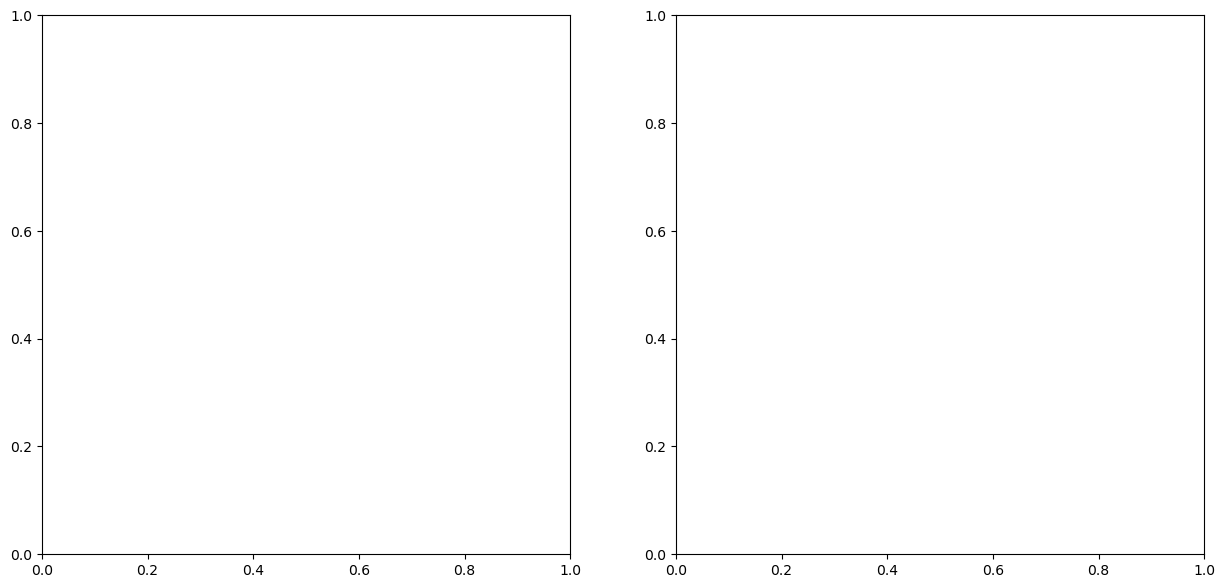

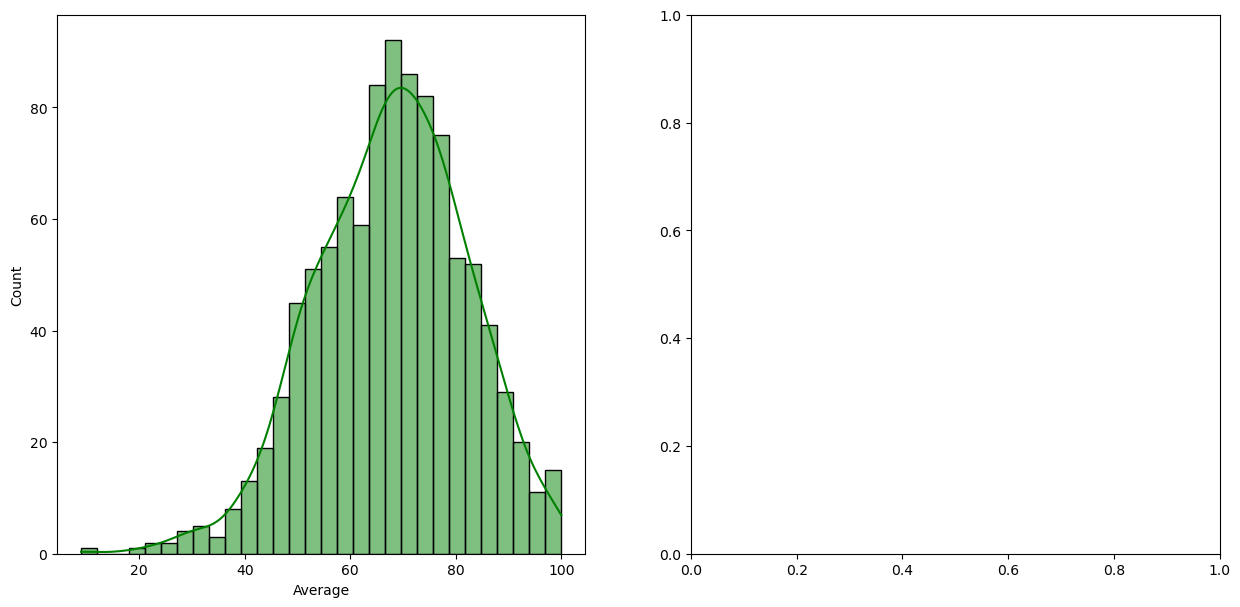

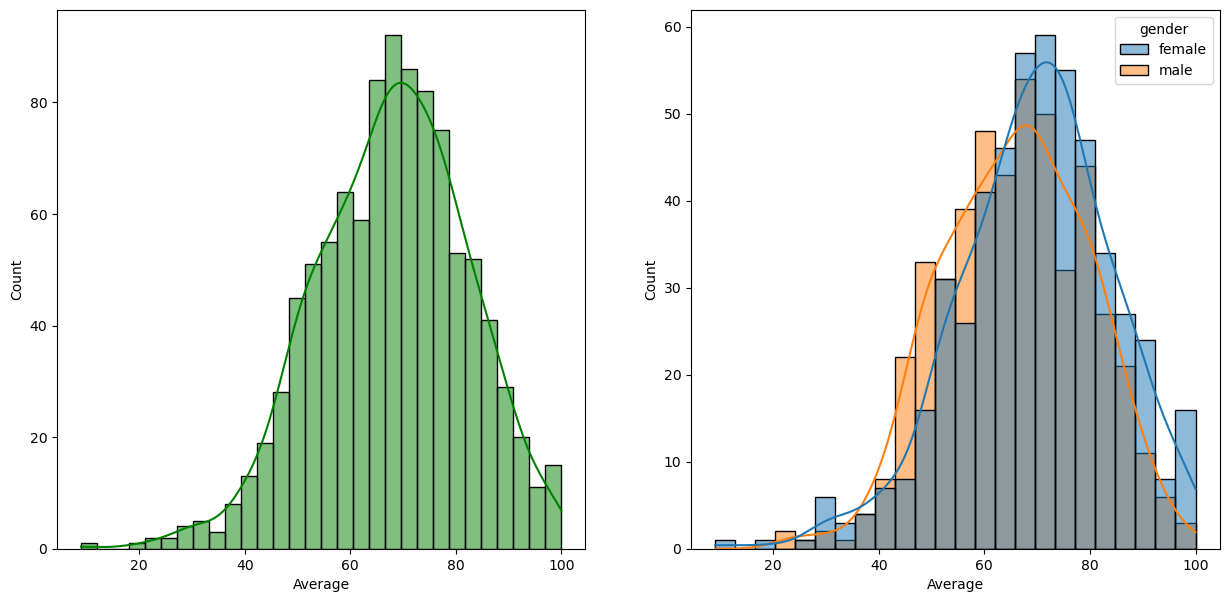

In [31]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins = 30,kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde = True,hue = 'gender')
plt.show()


insight:female performs well when compared to male

visualizing total score

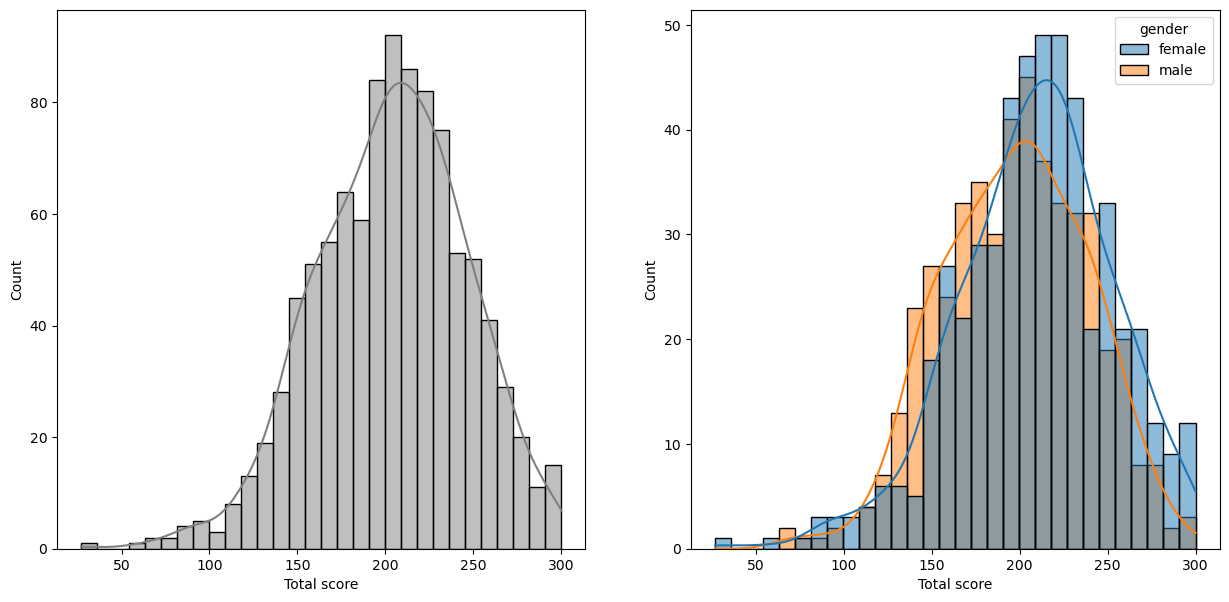

In [35]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='Total score',bins = 30,kde = True,color = 'grey')
plt.subplot(122)
sns.histplot(data = df,x='Total score',bins = 30,kde = True,hue = 'gender')
plt.show()


The majority of students have a total score that is between ~ 180 and 240.

We can see in the second graph that more females have gotten higher total scores than boys.

Female students tend to perform better overall compared to male students in this case.

visulalizing with math_score

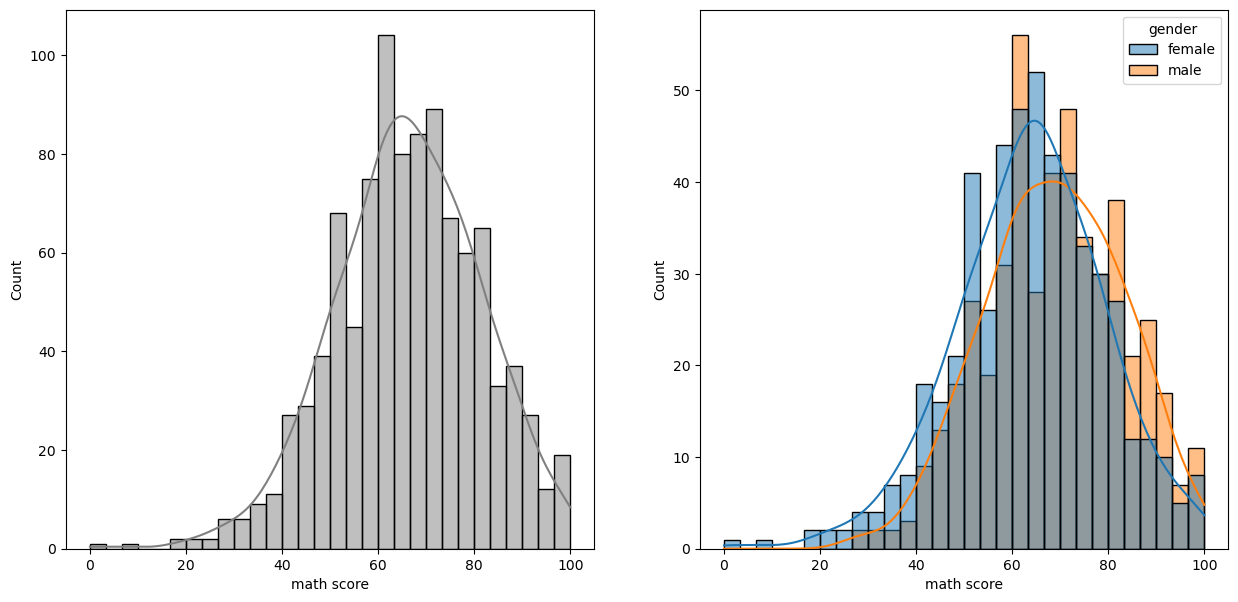

In [36]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='math score',bins = 30,kde = True,color = 'grey')
plt.subplot(122)
sns.histplot(data = df,x='math score',bins = 30,kde = True,hue = 'gender')
plt.show()

>comapred to females males are performed well in math score

average score based on lunch

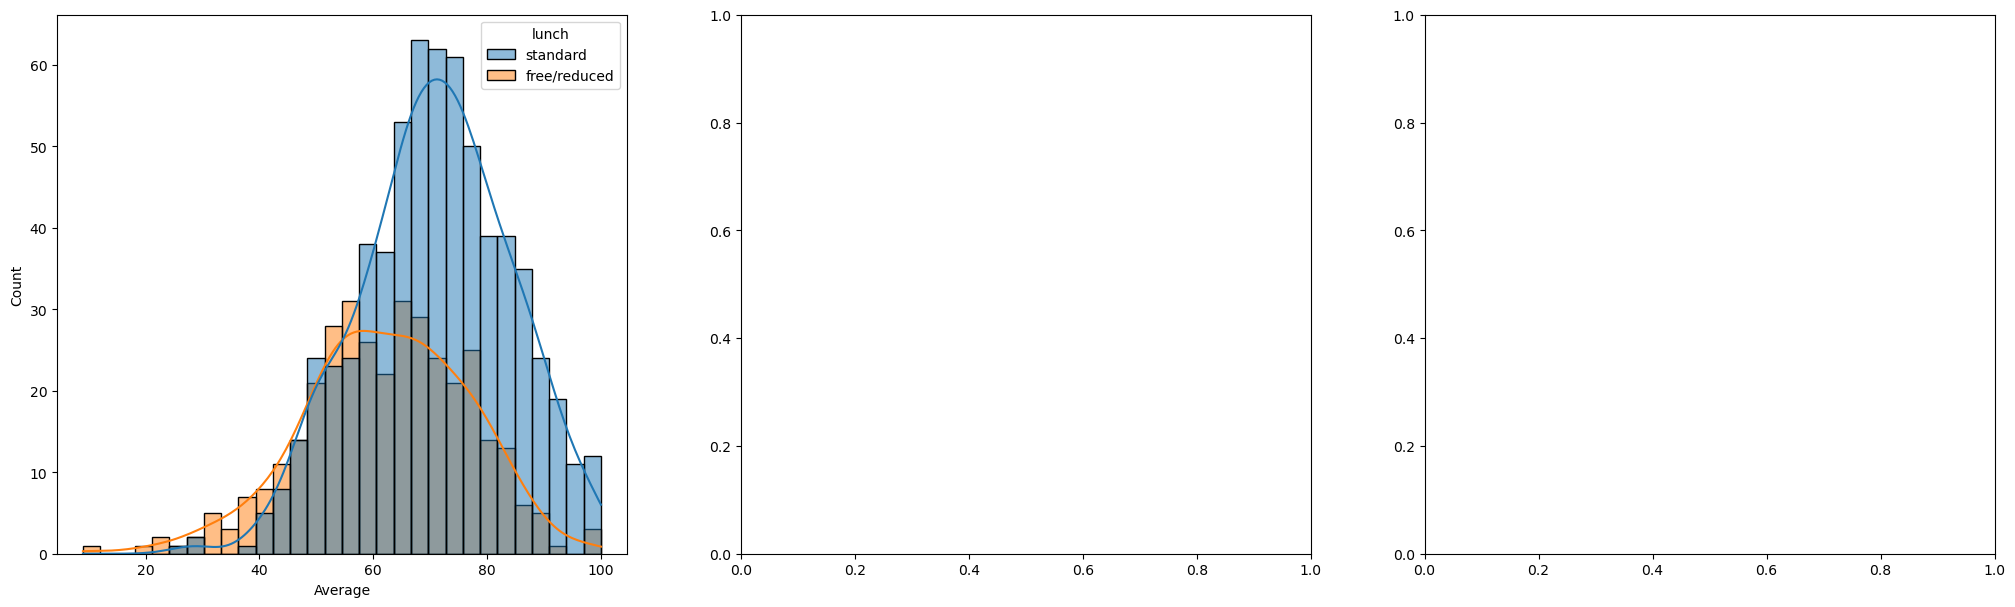

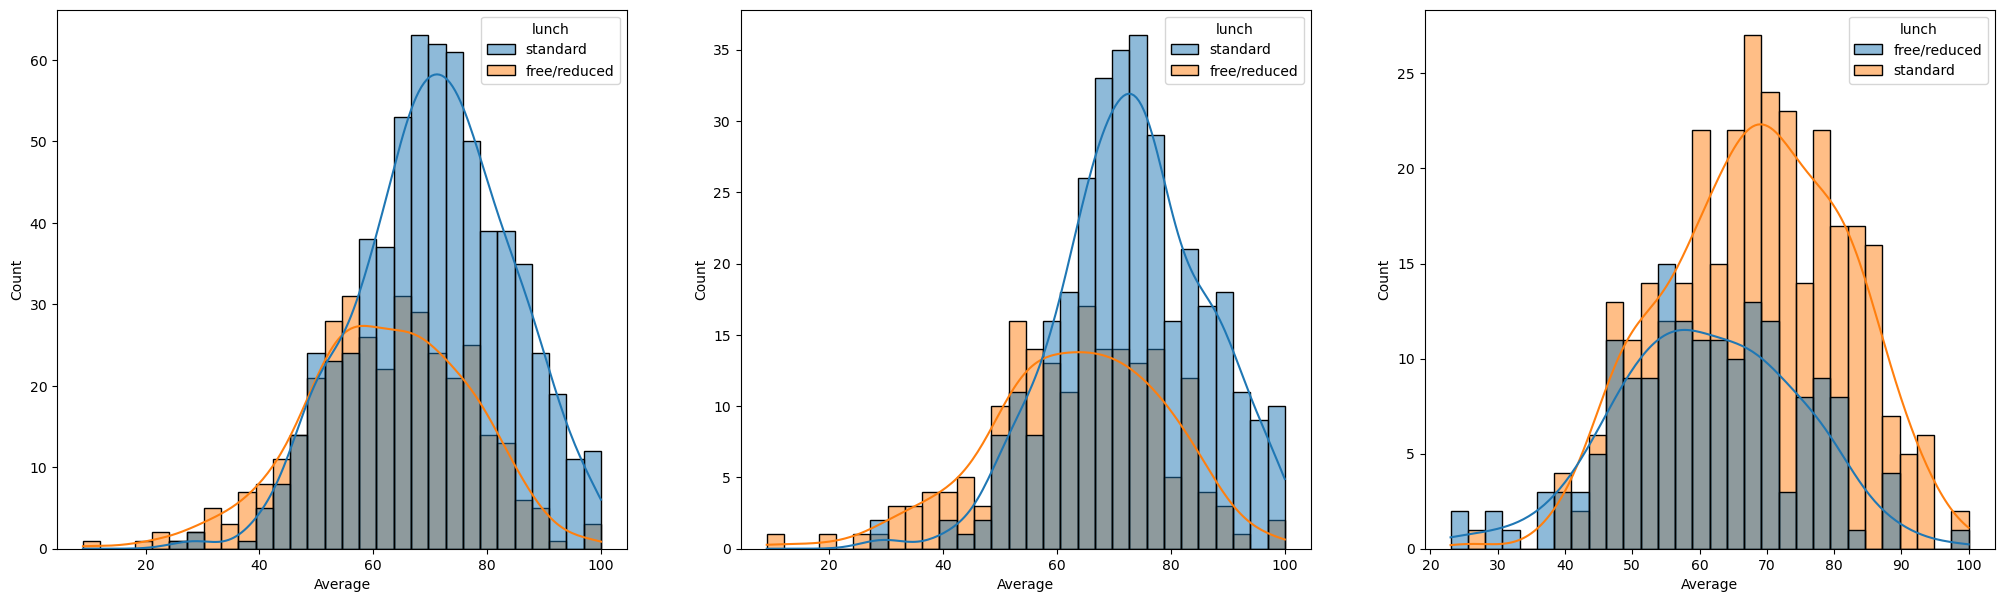

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x ='Average', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='Average', bins=30, kde=True, hue='lunch')
plt.show()

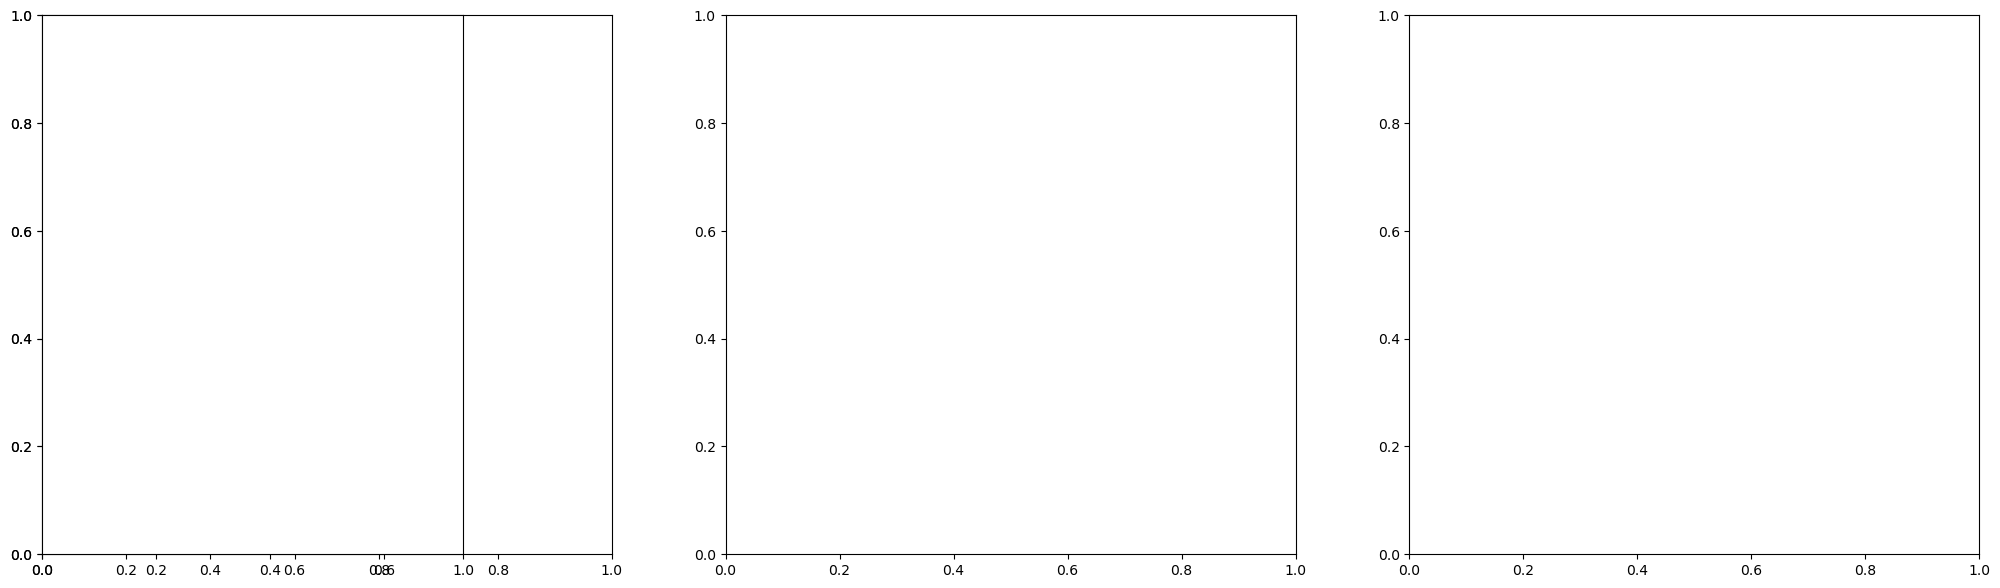

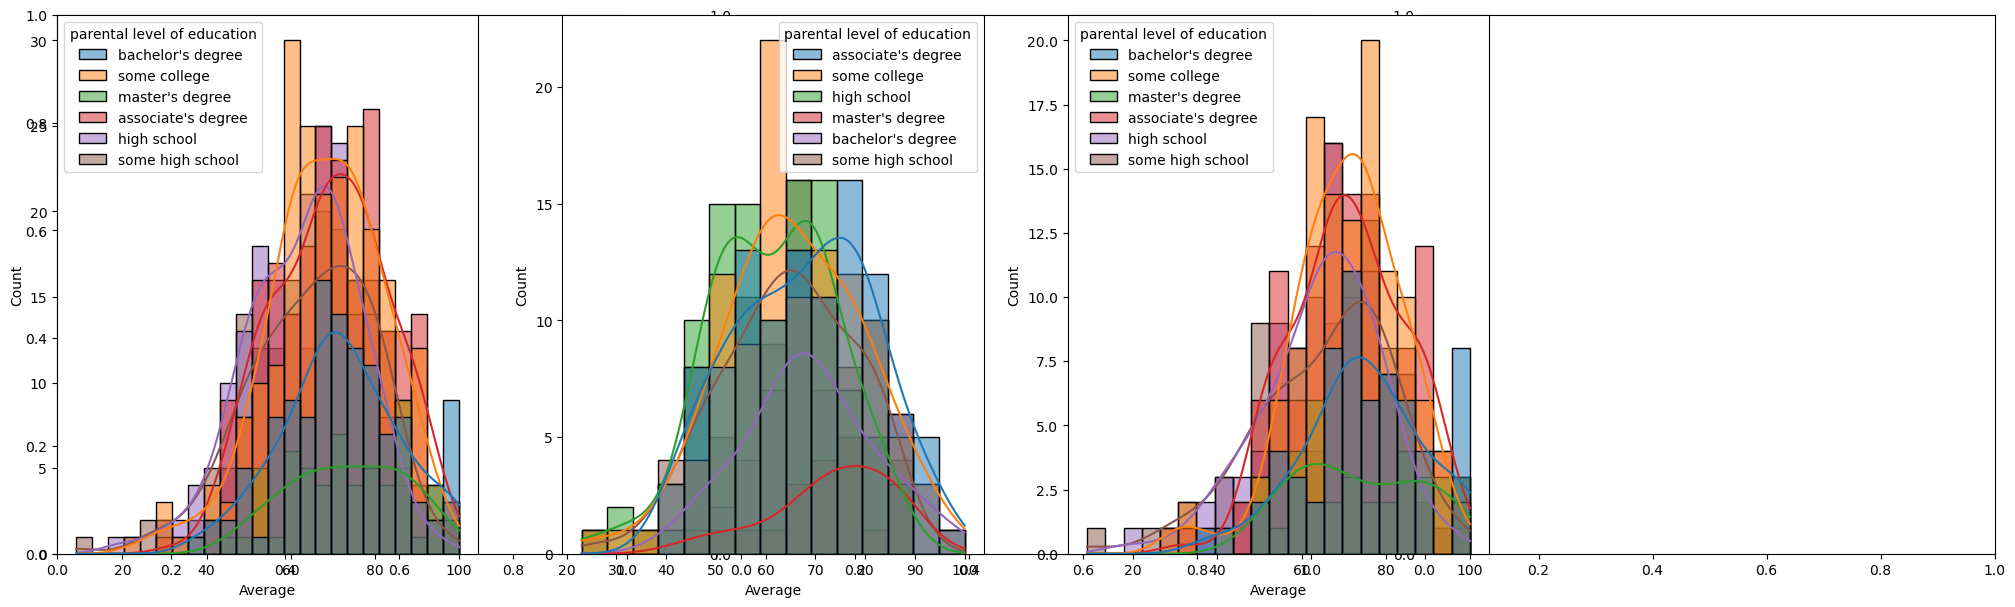

In [46]:
plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average', kde=True,
                  hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='Average',
                  kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='Average',
                  kde=True, hue='parental level of education')
plt.show()


First graph shows that parents that had some sort of masters or bachelors degree helped their children perform better.

Second graph shows that male students tend to perform better if they have parents the have associate or bachelors degree.

Third graph shows that higher education of parents doesn't really improve the performance of female students. Although, majority of females who got an average score of 100 or closer to 100 have either associate or bachelors degree.

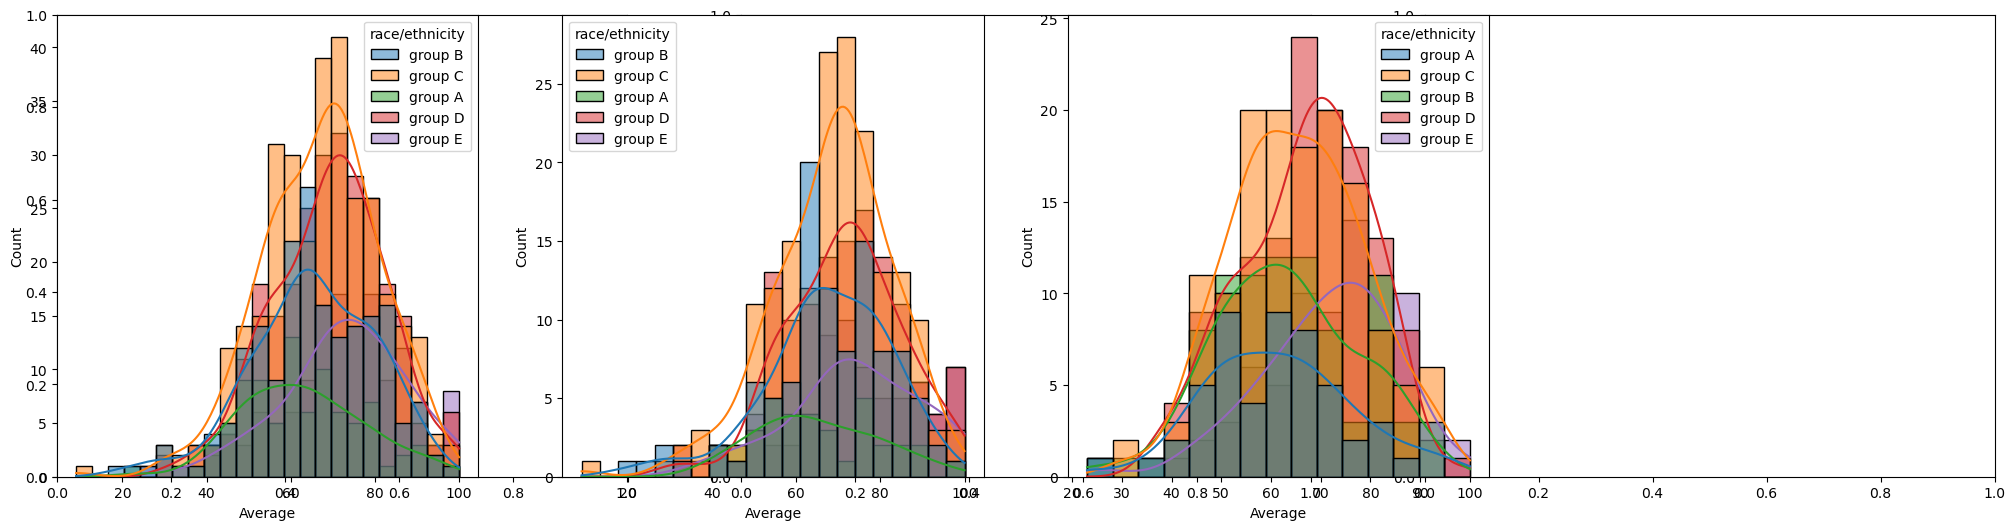

In [47]:

plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'],
                  x='Average', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'],
                  x='Average', kde=True, hue='race/ethnicity')
plt.show()

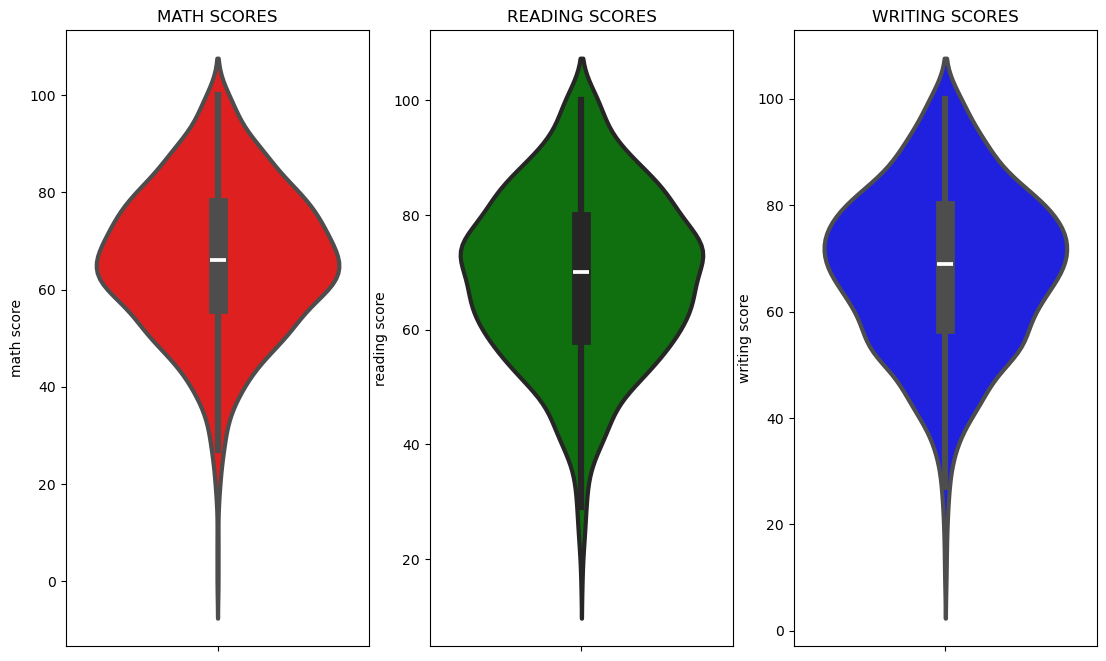

In [48]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

mostly the three scores are centered blw 60-80

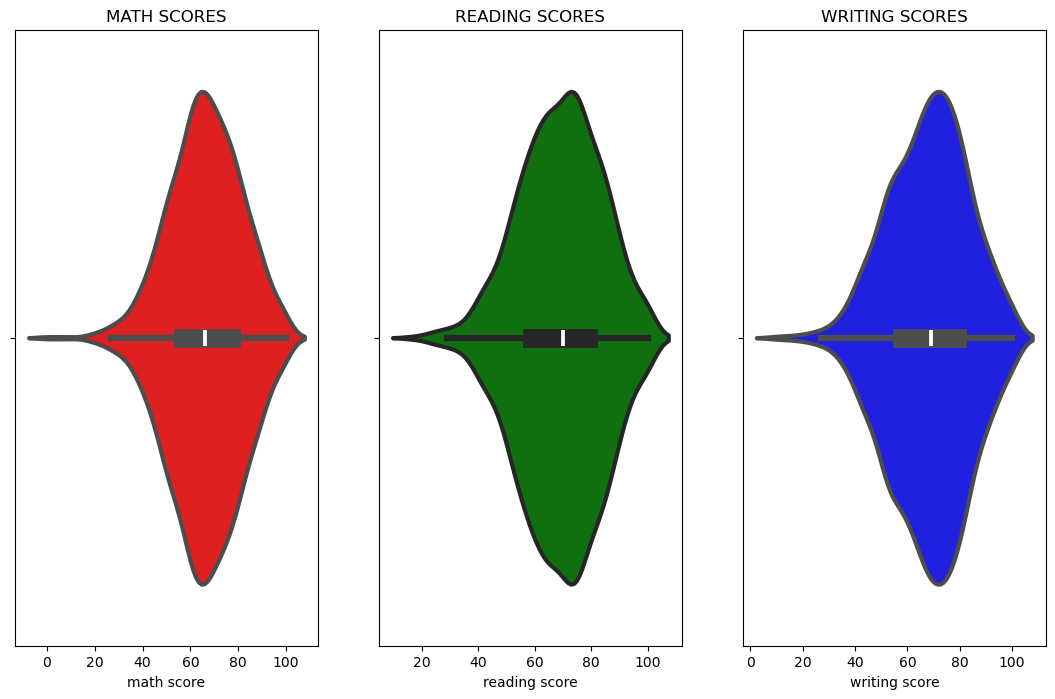

In [49]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(x='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(x='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(x='writing score', data=df, color='blue', linewidth=3)
plt.show()

Most of the students have scores in between 60 and 80 in maths.

Most of the students have scores in between 50 and 80 in reading and writing.

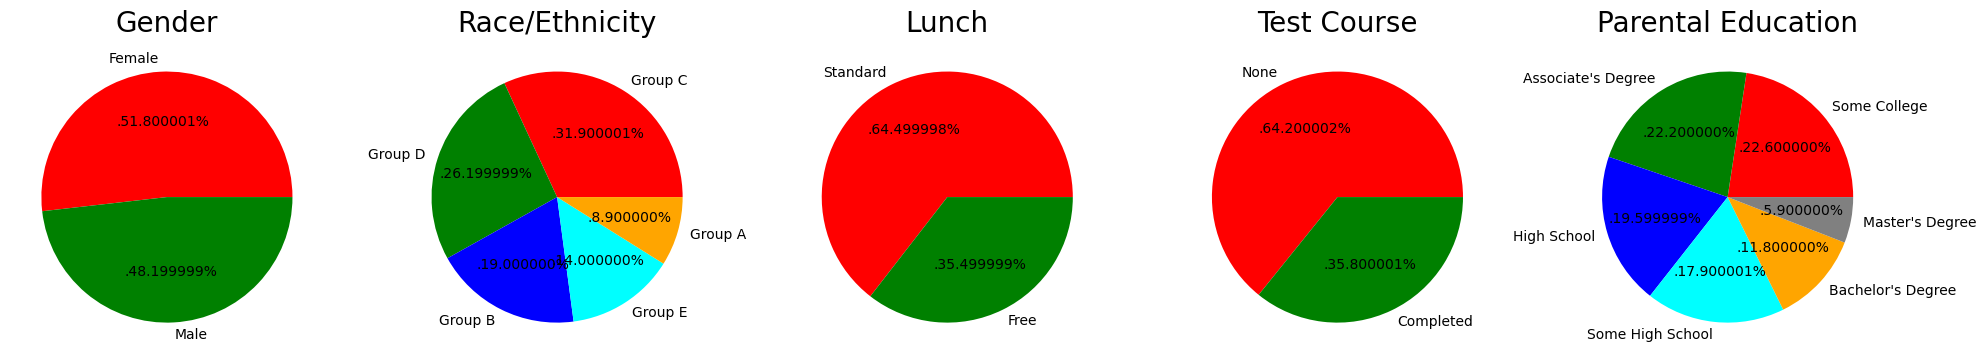

In [52]:
plt.rcParams['figure.figsize'] = (20, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree